# Assignment: Preparing Data for Analysis (Modified Titanic)

![](https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/%20files/hw.png)

In [251]:
#Import the libraries
import numpy as np
import pandas as pd

In [252]:
df = pd.read_csv('https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/datasets/hw/titanic_training_dataset_v2.csv')

In [253]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,S


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     865 non-null    float64
 2   Pclass       828 non-null    float64
 3   Name         866 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        858 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       852 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     803 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 83.7+ KB


# 1) Load data & review the data

<font color='blue'>Q1) What is the shape of this dataset? (rows & columns)</font>

In [255]:
df.shape

(891, 12)

# 2) Drop unqualified variables

*   Drop variables with missing > 50%
*   Drop categorical variables with flat values > 70% (variables with the same value in the same column)

<font color='blue'>Q2) How many columns do we have left?</font>




In [256]:
half_count = len(df)/2
df = df.dropna(thresh=half_count,axis=1)

In [257]:
df_cols = df.columns.to_list()

In [258]:
for col in df_cols:
  data = df.value_counts(subset=col)/len(df)
  for i in data.values:
    if i > 0.7:
      print(col)

Parch


In [259]:
df = df.drop(columns=["Parch"])

In [260]:
df.shape

(891, 10)

# 3) Remove all rows with missing target (the variable "Survived")

<font color='blue'>Q3) How many rows do we have left?</font>

In [261]:
df['Survived'].isna().sum()

26

In [262]:
df.dropna(subset=['Survived'],inplace=True)

In [263]:
df.shape

(865, 10)

# 4) Handle outliers 

For the variable “Fare”, replace outlier values with the boundary values


*   If value < (Q1 - 1.5IQR), relace with (Q1 - 1.5IQR)
*   If value > (Q3 + 1.5IQR), relace with (Q3 + 1.5IQR)

<font color='blue'>Q4) What is the mean of “Fare” after replacing the outliers (round 2 decimal points)?</font>



In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
%matplotlib inline

In [265]:
df['Fare'].isna().sum()

q75, q25 = np.percentile(df['Fare'], [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

print(q75)
print(q25)
print(iqr)
print(min)
print(max)

31.0
7.8958
23.1042
-26.7605
65.6563


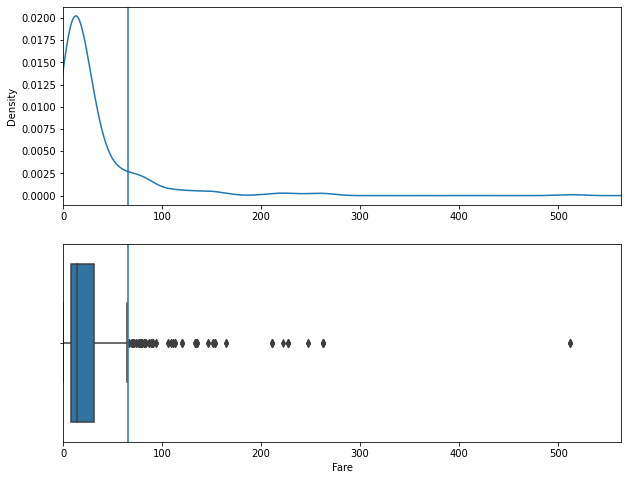

In [266]:
i = 'Fare'

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=max)

ax = df[i].plot(kind='kde')

plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])
plt.axvline(x=min)
plt.axvline(x=max)

In [267]:
df.loc[df['Fare']>max,'Fare'] = max
df.loc[df['Fare']<min,'Fare'] = min

In [268]:
round(df['Fare'].mean(),2)

24.04

# 5) Impute missing value



*   Show the number of missing values in each variable
*   Impute missing values with mean & mode
*   Show the number of missing values again after missing value imputation

<font color='blue'>Q5) Which variable has the largest number of missing values?</font>



In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  865 non-null    int64  
 1   Survived     865 non-null    float64
 2   Pclass       802 non-null    float64
 3   Name         840 non-null    object 
 4   Sex          865 non-null    object 
 5   Age          693 non-null    float64
 6   SibSp        832 non-null    float64
 7   Ticket       826 non-null    object 
 8   Fare         865 non-null    float64
 9   Embarked     778 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 74.3+ KB


In [270]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass          63
Name            25
Sex              0
Age            172
SibSp           33
Ticket          39
Fare             0
Embarked        87
dtype: int64

In [271]:
df.fillna(df.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [272]:
df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name           25
Sex             0
Age             0
SibSp           0
Ticket         39
Fare            0
Embarked       87
dtype: int64

In [273]:
df.fillna(df.mode().iloc[0],inplace=True)

In [274]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 6) Convert categorical to numeric values



*   Drop the variables “Name” & “Ticket”
*   For the variables “Sex” & “Embarked”, perform the dummy coding and drop the first level. Also, drop those original variables (“Sex” & “Embarked”)

<font color='blue'>Q6) How many columns do we have?</font>



In [276]:
df = df.drop(['Name','Ticket'],axis=1)

In [277]:
nominal_columns = ["Sex","Embarked"]
dummy_df = pd.get_dummies(df[nominal_columns], drop_first=True) 
df_with_dummy_df = pd.concat([df, dummy_df], axis=1)
df_with_dummy_df = df_with_dummy_df.drop(nominal_columns, axis=1)
print(df_with_dummy_df.shape)


(865, 9)


In [278]:
# from sklearn.preprocessing import OneHotEncoder
# # creating instance of one-hot-encoder
# enc = OneHotEncoder(handle_unknown='ignore') # this feature will be all zeros
# # passing bridge-types-cat column (label encoded values of bridge_types)
# df_columns = ["Sex", "Embarked"]
# enc_df = pd.DataFrame(enc.fit_transform(df[df_columns]).toarray())
# enc_df = enc_df.drop(columns=0)
# df = pd.merge(df, enc_df, left_index=True, right_index=True)
# df[['Sex','Embarked',1,2,3,4]][(df['Sex']=='male')&(df['Embarked']=='S')]


# 7) Partition data



*   Split train/test split with stratification using 70%:30% and random seed with 12345
*   Show a proportion between survived (1) and died (0) in all data sets (total data, train, test)

<font color='blue'>Q7) What is a proportion between survived (1) and died (0) in the training data?</font>



In [279]:
from sklearn.model_selection import train_test_split
y = df.pop('Survived')
X = df
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3, random_state=12345)

In [292]:
print(y_train.value_counts() / y_train.shape[0])
print(y_test.value_counts() / y_test.shape[0])

0.0    0.616529
1.0    0.383471
Name: Survived, dtype: float64
0.0    0.615385
1.0    0.384615
Name: Survived, dtype: float64
